In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')

In [5]:
df.info

<bound method DataFrame.info of        Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
0      2018-01-02  10:56:33    8.0        37077  Female         Web   
1      2018-07-24  20:41:37    2.0        59173  Female         Web   
2      2018-11-08  08:38:49    8.0        41066  Female         Web   
3      2018-04-18  19:28:06    7.0        50741  Female         Web   
4      2018-08-13  21:18:39    9.0        53639  Female         Web   
...           ...       ...    ...          ...     ...         ...   
51285  2018-02-28  22:59:50    6.0        78489  Female      Mobile   
51286  2018-02-28  13:19:25    2.0        91941  Female      Mobile   
51287  2018-02-28  10:25:07    6.0        63313    Male         Web   
51288  2018-02-28  10:50:08    7.0        86485    Male         Web   
51289  2018-02-28  11:09:40    5.0        81129    Male         Web   

      Customer_Login_type    Product_Category            Product  Sales  \
0                  Member  Auto & Access

In [9]:
# hacer el eda de el df
df.info()
df.describe()
df.head()
df.tail()
df.shape
df.columns
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Product_Category'].unique()
df['Product_Category'].value_counts()
df['Payment_method'].unique()
df['Payment_method'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null  obje

Payment_method
credit_card    38131
money_order     9628
e_wallet        2789
debit_card       733
not_defined        1
Name: count, dtype: int64

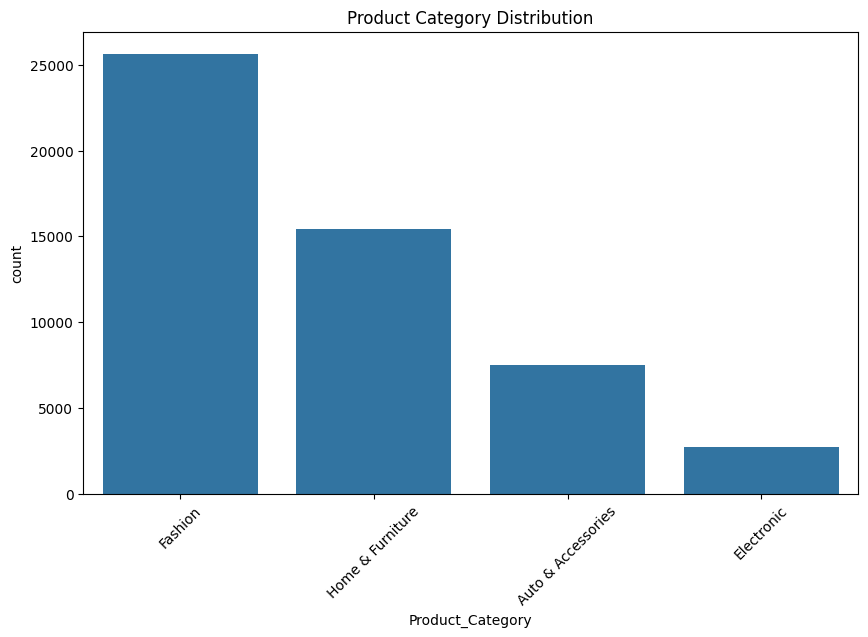

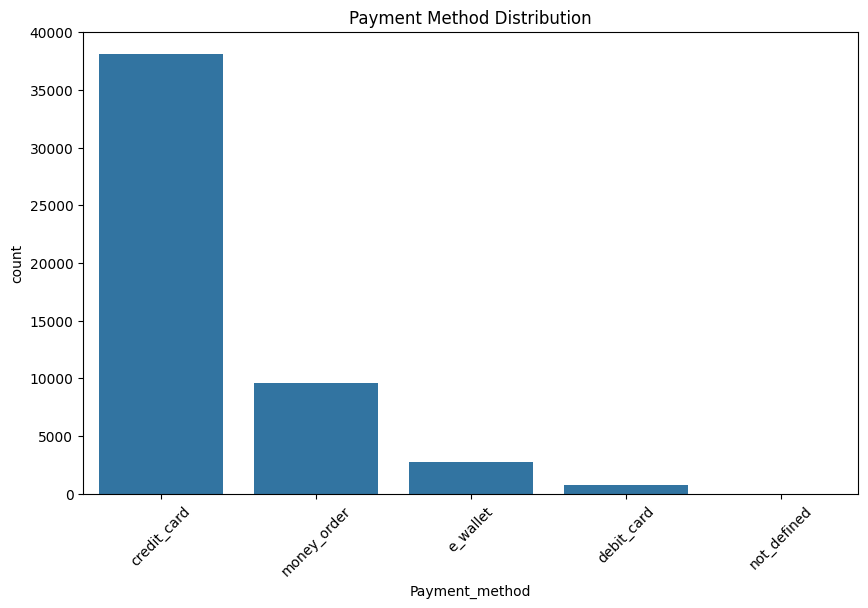

In [10]:
# Exploratory Data Analysis (EDA) of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_method', order=df['Payment_method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()

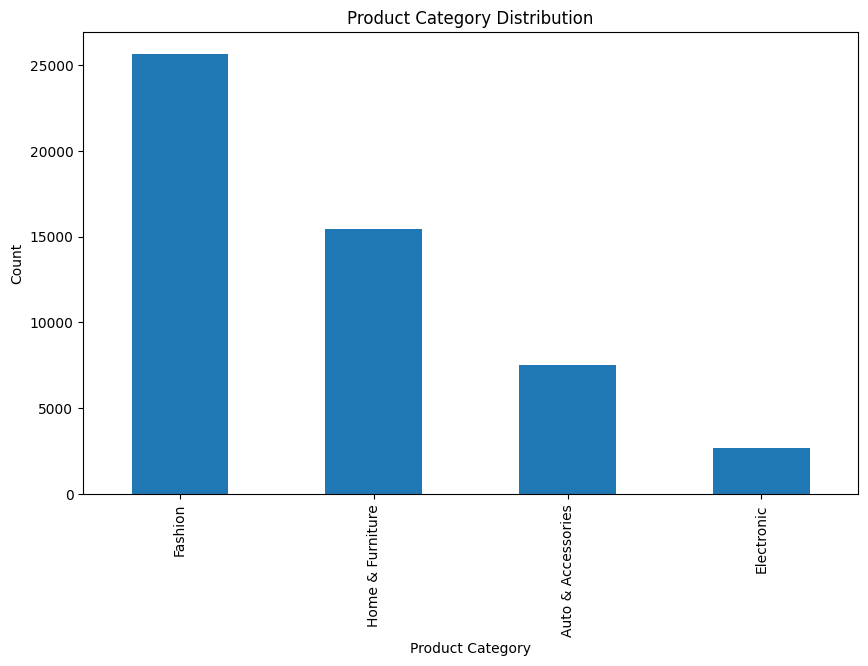

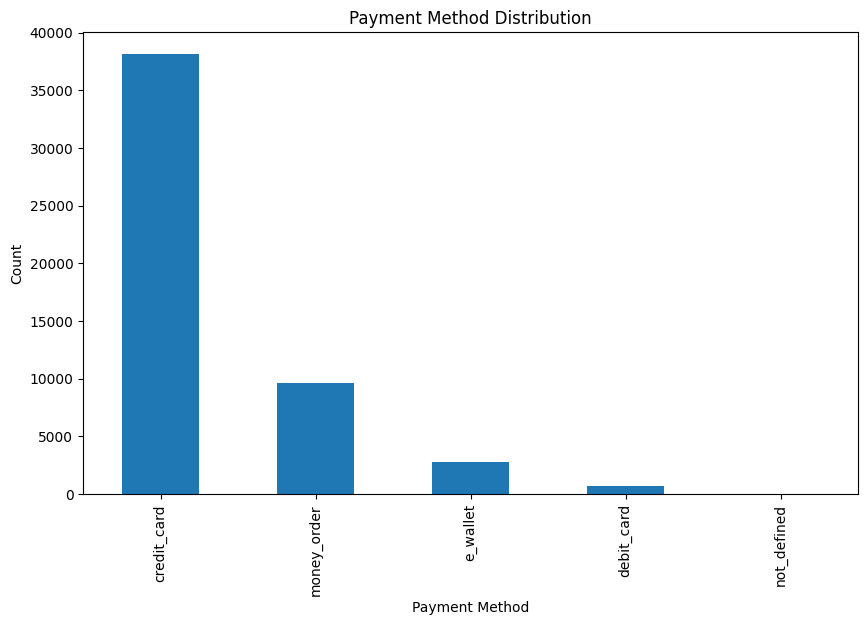

In [11]:
# realiza una exploracion de los datos
df['Product_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()
df['Payment_method'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


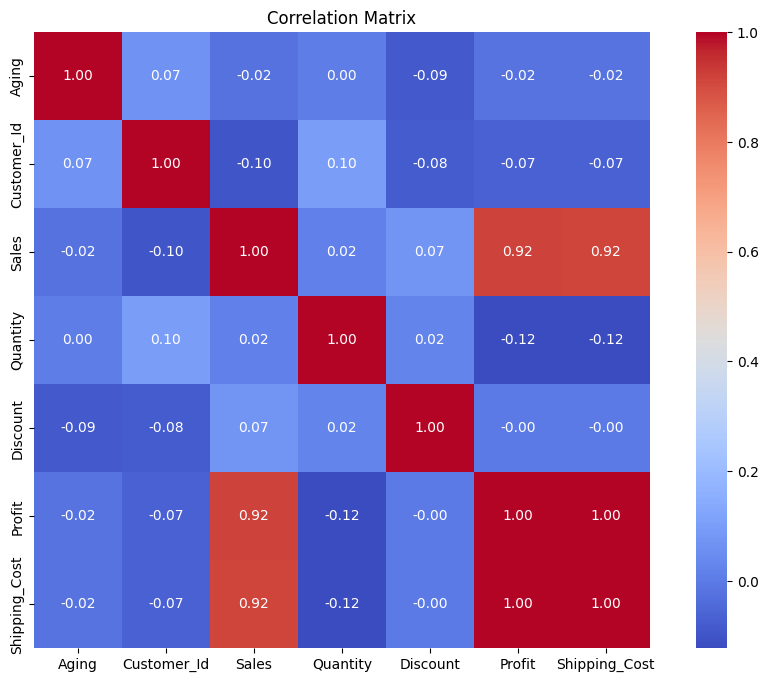

In [13]:
# realiza un analisis de correlacion
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

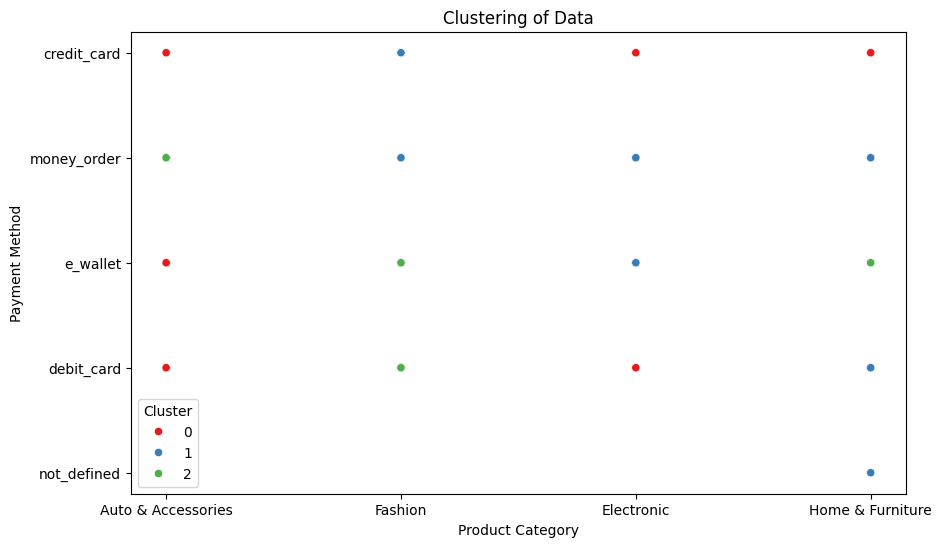

In [14]:
# haz un clustering de los datos
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Product_Category', y='Payment_method', hue='Cluster', palette='Set1')
plt.title('Clustering of Data')
plt.xlabel('Product Category')
plt.ylabel('Payment Method')
plt.legend(title='Cluster')
plt.show()

In [15]:
# hazme las metricas basicas de los clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)

Silhouette Score: 0.24975843144683516
Davies-Bouldin Score: 1.6930315185805405


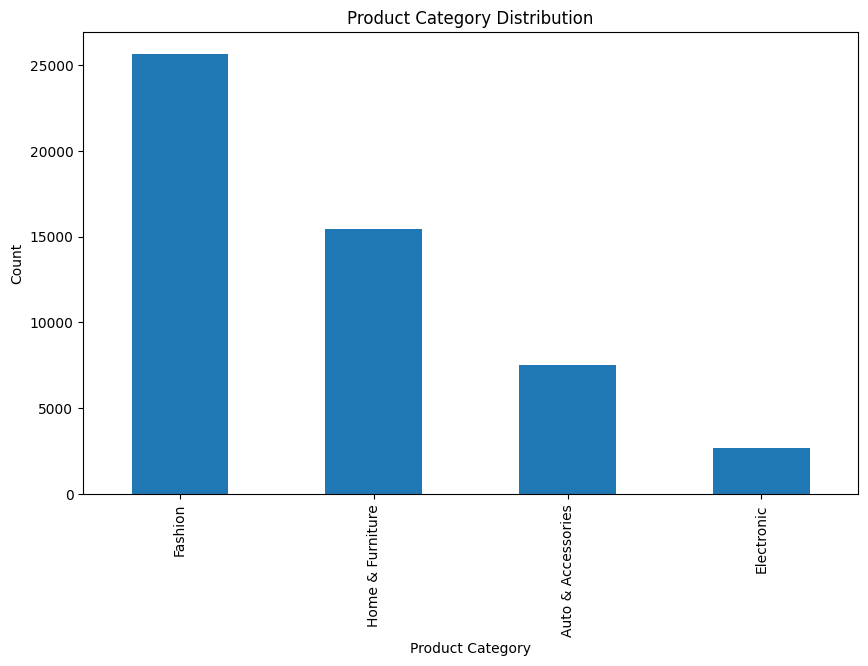

In [16]:
# Cualitative Individual Analysis
df = pd.read_csv(r'C:\Users\MASTER\Documents\curso_phyton\ecommerce\multinacional\E-commerce Dataset_mervemenekse.csv')
df['Product_Category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

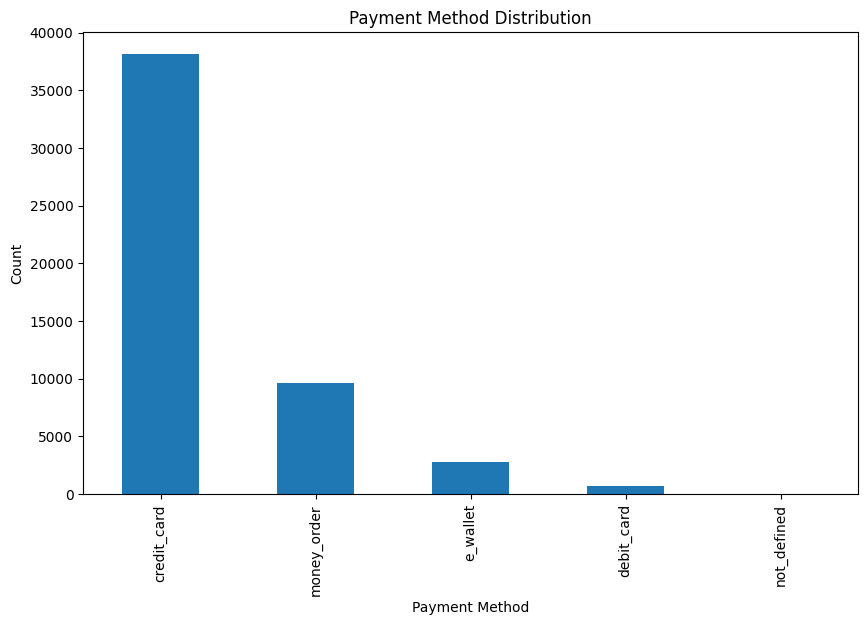

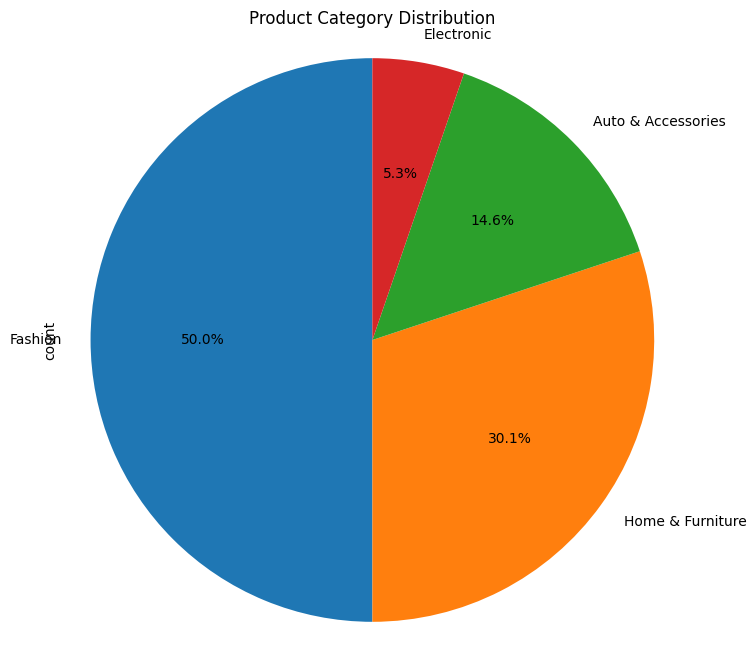

In [17]:
# Merge all graphics to Analyze market tendencies
df['Payment_method'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()
df['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Product Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()